<a href="https://colab.research.google.com/github/SalahuddinRahat/my_personal_project/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = fetch_california_housing()
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names

In [3]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


###devide dependent and independent features

In [6]:
X = dataset
y = df.target

###train test split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

### standardizing the datset

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression model

In [11]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

### cross validation

In [12]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("Cross-validation MSE (neg):", mse)
print("Mean Negative MSE:", mse.mean())

Cross-validation MSE (neg): [-0.54787556 -0.500835   -0.52045639 -0.51612252 -0.54883741]
Mean Negative MSE: -0.5268253746355749


### Train the model on the full training data

In [13]:
regression.fit(X_train, y_train)

LinearRegression()

###prediction

In [14]:
rgd_pred = regression.predict(X_test)

In [ ]:
###R^2  score

In [15]:
from sklearn.metrics import r2_score
score = r2_score(y_test, rgd_pred)
print("R² Score:", score)

R² Score: 0.5957702326061662


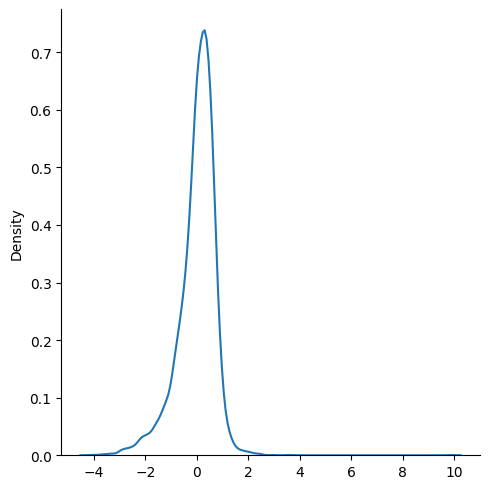

In [16]:
import seaborn as sns
sns.displot(rgd_pred-y_test,kind='kde')